In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


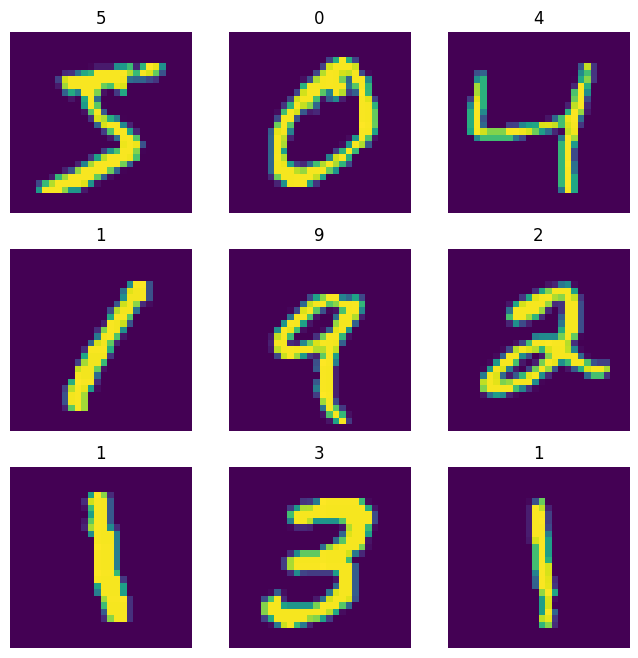

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15



C:\Users\swaro\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



1875/1875 [==============================] - 5s 2ms/step - loss: 0.5914 - accuracy: 0.8188 - val_loss: 0.5247 - val_accuracy: 0.8816
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.9170 - val_loss: 0.3575 - val_accuracy: 0.9174
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1978 - accuracy: 0.9408 - val_loss: 0.2694 - val_accuracy: 0.9406
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1497 - accuracy: 0.9550 - val_loss: 0.2245 - val_accuracy: 0.9497
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1197 - accuracy: 0.9639 - val_loss: 0.1893 - val_accuracy: 0.9580
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1007 - accuracy: 0.9688 - val_loss: 0.1776 - val_accuracy: 0.9644
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9741 - val_loss: 0.1735 - val_accuracy: 0.9656
Ep

In [11]:
import cv2

In [12]:
image = cv2.imread('3.png')[:,:,0]
image = cv2.resize(image, (28, 28))
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 122ms/step
8


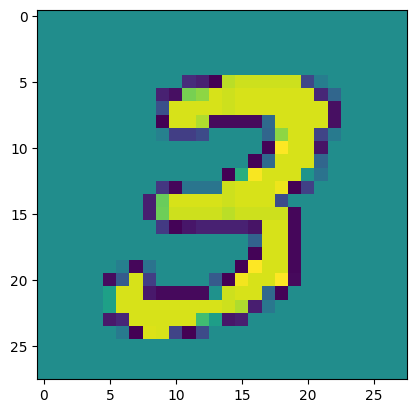

In [13]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [14]:
model.save('hand_written_Digit_recog_model.keras')

In [15]:
!pip install streamlit

In [ ]:
!streamlit run /content/app.py &> /content/logs.txt &

In [ ]:
!npx localtunnel --port 8501